# Classification MNIST avec Réseaux de Neurones

Dans ce notebook, nous allons explorer trois méthodes pour implémenter un réseau de neurones simple pour classifier le dataset MNIST. Nous utiliserons :
- **Keras/TensorFlow** pour une approche simple et intuitive
- **PyTorch** pour une approche plus flexible
- **Une implémentation from scratch** pour comprendre les bases du fonctionnement d'un réseau de neurones

Le dataset MNIST est un ensemble de données classique utilisé pour entraîner et tester les modèles de classification d'images. Il contient 60 000 images d'entraînement et 10 000 images de test de chiffres manuscrits (0 à 9).

In [20]:
! pip install --upgrade pip
! pip install tensorflow[and-cuda]
! pip install matplotlib
! pip install torch
! pip install pydot

  Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.3.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.3.101-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cudnn_cu12-8.9.7.29-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cufft_cu12-11.0.12.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.4.107-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.5.4.101-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.2.0.103-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl.metadata (1.8 kB)
Using cached nvidia_cublas_cu12-12.3.4.1-py3-none-manylinux1_

In [13]:
# Pour Keras/TensorFlow
import tensorflow as tf
from tensorflow.keras import layers, models

# Pour PyTorch
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Pour l'approche "From Scratch"
import numpy as np

# Pour la visualisation
import matplotlib.pyplot as plt

# Lecture image
from PIL import Image

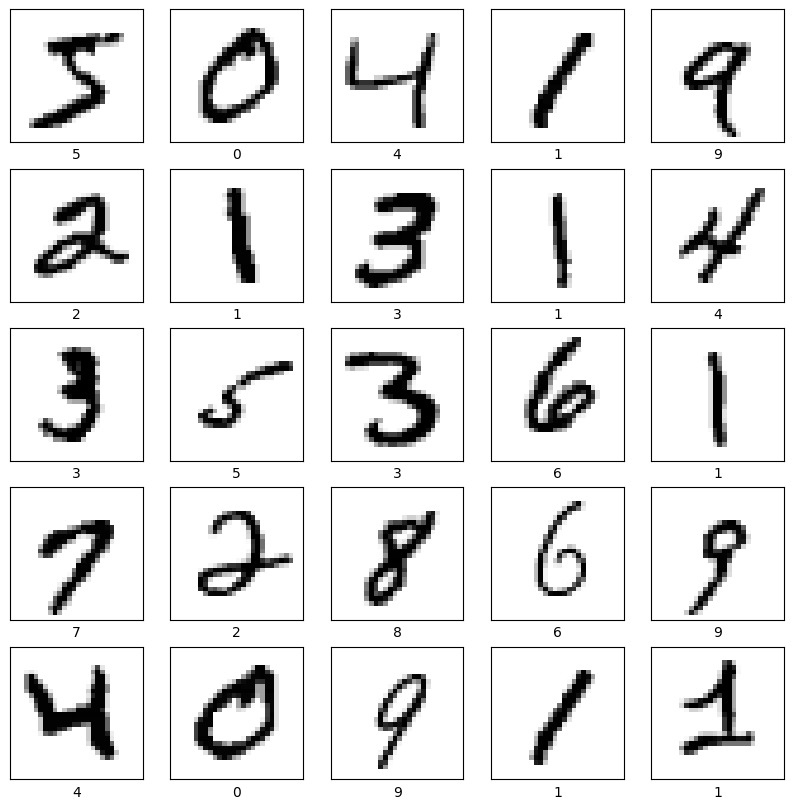

In [5]:
# Chargement des données
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation des images
x_train = X_train / 255.0
x_test = X_test / 255.0

# Visualisation des exemples
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

### Keras/TensorFlow

In [11]:
# Chargement des données MNIST
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation des données
X_train, X_test = X_train / 255.0, X_test / 255.0

# Ajout d'une dimension de canal (nécessaire pour les couches convolutives)
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Conversion des labels en catégories (one-hot encoding)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [12]:
# Création du modèle avec Keras
model = models.Sequential([
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compilation du modèle
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Entraînement
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)


/home/prod-ai/Desktop/deepenv/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
I0000 00:00:1725293349.692522  120171 cuda_executor.cc:1015] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-09-02 18:09:09.694312: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2343] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required librari

Epoch 1/10


2024-09-02 18:09:10.230316: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 9ms/step - accuracy: 0.9011 - loss: 0.3526 - val_accuracy: 0.9828 - val_loss: 0.0540
Epoch 2/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9848 - loss: 0.0480 - val_accuracy: 0.9876 - val_loss: 0.0337
Epoch 3/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9904 - loss: 0.0292 - val_accuracy: 0.9869 - val_loss: 0.0406
Epoch 4/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9937 - loss: 0.0212 - val_accuracy: 0.9874 - val_loss: 0.0372
Epoch 5/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9944 - loss: 0.0176 - val_accuracy: 0.9902 - val_loss: 0.0319
Epoch 6/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9888 - val_loss: 0.0342
Epoch 7/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9970 - loss: 0.0096 - val_accuracy: 0.9896 - val_loss: 0.0363
Epoch 8/10
938/938 ━━━━━━━━━━━━━━━━━━━━ 8s 9ms/step - accuracy: 0.9968 - loss: 0.0098 - val_accuracy: 0.9903 - val

In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 675,104 (2.58 MB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 450,070 (1.72 MB)

In [ ]:
# Évaluation sur les données de test
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

In [15]:
image_path = "sample_image.png"
image = Image.open(image_path)
image = image.resize((28,28))
image = image.convert('L')
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Le modèle prédit: {predicted_label[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Le modèle prédit: 7


In [16]:
image_path = "sample_image.png"
image = Image.open(image_path)
image = image.resize((28,28))
image = image.rotate(180)
image = image.convert('L')
image_array = np.array(image) / 255.0

image_array = np.expand_dims(image_array, axis=0)
image_array = np.expand_dims(image_array, axis=-1)

prediction = model.predict(image_array)
predicted_label = np.argmax(prediction, axis=1)
print(f'Le modèle prédit: {predicted_label[0]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Le modèle prédit: 4


In [22]:
from tensorflow.keras.utils import plot_model

# Afficher le schéma du modèle et le sauvegarder en tant qu'image
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


### PyTorch

In [ ]:
from torchvision import datasets, transforms

# Définition des transformations
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))])

# Chargement des données
train_dataset = datasets.MNIST(root='data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='data', train=False, transform=transform, download=True)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = nn.ReLU()(x)
        x = self.conv2(x)
        x = nn.ReLU()(x)
        x = nn.MaxPool2d(2)(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = nn.ReLU()(x)
        x = self.fc2(x)
        return nn.LogSoftmax(dim=1)(x)

# Instantiation du modèle
model = Net()

# Définition de l'optimiseur et de la fonction de perte
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

# Entraînement
epochs = 10
for epoch in range(epochs):
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()
        output = model(data)
        loss = criterion(output, target)
        loss.backward()
        optimizer.step()


In [ ]:
# Évaluation du modèle PyTorch
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for data, target in test_loader:
        outputs = model(data)
        _, predicted = torch.max(outputs.data, 1)
        total += target.size(0)
        correct += (predicted == target).sum().item()

print(f'Test accuracy: {100 * correct / total}%')

## "From Scratch"

In [ ]:
# Chargement des données depuis Keras
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalisation
X_train, X_test = X_train / 255.0, X_test / 255.0

# Conversion des labels en one-hot encoding
y_train = np.eye(10)[y_train]
y_test = np.eye(10)[y_test]

In [ ]:
# Définition des fonctions d'activation
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum(axis=1, keepdims=True)

# Définition du réseau de neurones simple
class SimpleNN:
    def __init__(self):
        self.W1 = np.random.randn(784, 128) * 0.01
        self.b1 = np.zeros((1, 128))
        self.W2 = np.random.randn(128, 10) * 0.01
        self.b2 = np.zeros((1, 10))

    def forward(self, X):
        self.Z1 = np.dot(X, self.W1) + self.b1
        self.A1 = sigmoid(self.Z1)
        self.Z2 = np.dot(self.A1, self.W2) + self.b2
        self.A2 = softmax(self.Z2)
        return self.A2

    def compute_loss(self, Y, Y_hat):
        m = Y.shape[0]
        logprobs = -np.log(Y_hat[range(m), Y.argmax(axis=1)])
        loss = np.sum(logprobs) / m
        return loss

    def backward(self, X, Y, Y_hat, learning_rate=0.1):
        m = X.shape[0]
        dZ2 = Y_hat - Y
        dW2 = np.dot(self.A1.T, dZ2) / m
        db2 = np.sum(dZ2, axis=0, keepdims=True) / m
        dZ1 = np.dot(dZ2, self.W2.T) * self.A1 * (1 - self.A1)
        dW1 = np.dot(X.T, dZ1) / m
        db1 = np.sum(dZ1, axis=0, keepdims=True) / m

        self.W1 -= learning_rate * dW1
        self.b1 -= learning_rate * db1
        self.W2 -= learning_rate * dW2
        self.b2 -= learning_rate * db2

    def train(self, X_train, y_train, epochs=10, learning_rate=0.1):
        for epoch in range(epochs):
            Y_hat = self.forward(X_train)
            loss = self.compute_loss(y_train, Y_hat)
            print(f'Epoch {epoch + 1}/{epochs}, Loss: {loss}')
            self.backward(X_train, y_train, Y_hat, learning_rate)

# Prétraitement des données
X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

# Entraînement du modèle
model = SimpleNN()
model.train(X_train_flat, y_train, epochs=10, learning_rate=0.1)


In [ ]:
# Prédictions sur les données de test
y_pred = model.forward(X_test_flat)
test_accuracy = np.mean(np.argmax(y_pred, axis=1) == np.argmax(y_test, axis=1))
print(f'Test accuracy: {test_accuracy * 100}%')